In [157]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [48]:
CI = pd.read_csv('country-income.csv')
CI

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


In [49]:
CI.isna().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

In [50]:
CI2 = CI.copy()
print(CI2.dtypes)

Region             object
Age               float64
Income            float64
Online Shopper     object
dtype: object


In [51]:
CI2 = CI2.fillna(CI2[['Age','Income']].mean())
CI2

,Region,Age,Income,Online Shopper
0,India,49.000000,86400.000000,No
1,Brazil,32.000000,57600.000000,Yes
2,USA,35.000000,64800.000000,No
3,Brazil,43.000000,73200.000000,No
4,USA,45.000000,76533.333333,Yes
5,India,40.000000,69600.000000,Yes
6,Brazil,43.777778,62400.000000,No
7,India,53.000000,94800.000000,Yes
8,USA,55.000000,99600.000000,No
9,India,42.000000,80400.000000,Yes


In [81]:
CI3 = CI2.copy()
region_num = {'India':1, 'Brazil':2, 'USA':3}
shopper_num = {'Yes':1,'No':0}

CI3.Region = CI3.Region.apply(lambda x: region_num[x] if x in region_num.keys() else x)
CI3['Online Shopper'] = CI3['Online Shopper'].apply(lambda x: shopper_num[x] if x in shopper_num.keys() else x)
print(CI3)
CI3.dtypes

   Region        Age        Income  Online Shopper
0       1  49.000000  86400.000000               0
1       2  32.000000  57600.000000               1
2       3  35.000000  64800.000000               0
3       2  43.000000  73200.000000               0
4       3  45.000000  76533.333333               1
5       1  40.000000  69600.000000               1
6       2  43.777778  62400.000000               0
7       1  53.000000  94800.000000               1
8       3  55.000000  99600.000000               0
9       1  42.000000  80400.000000               1


Region              int64
Age               float64
Income            float64
Online Shopper      int64
dtype: object

In [79]:
shoes = pd.read_csv('shoesize.csv')
print(shoes.head())
print(len(shoes))

   Index Gender  Size  Height
0      1      F   5.5    60.0
1      2      F   6.0    60.0
2      3      F   7.0    60.0
3      4      F   8.0    60.0
4      5      F   8.0    60.0
408


In [82]:
sizes_f = shoes[shoes.Gender == 'F']
print(sizes_f.head())
print(len(sizes_f))

   Index Gender  Size  Height
0      1      F   5.5    60.0
1      2      F   6.0    60.0
2      3      F   7.0    60.0
3      4      F   8.0    60.0
4      5      F   8.0    60.0
187


In [104]:
sizes_m = shoes[shoes.Gender == 'M']
print(sizes_m.head())
print(len(sizes_m))

     Index Gender  Size  Height
187    188      M  10.5    63.0
188    189      M   9.0    63.0
189    190      M   7.5    64.0
190    191      M   8.0    64.0
191    192      M  10.0    64.0
221


In [76]:
print(len(sizes_f)+len(sizes_m))

408


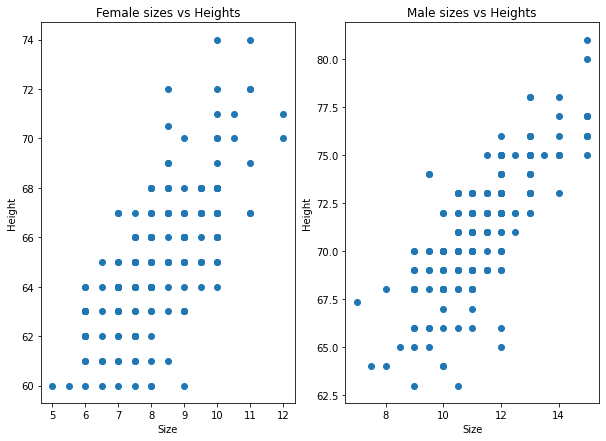

In [108]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,7))
ax1.scatter(sizes_f.Size,sizes_f.Height)
ax1.set_title('Female sizes vs Heights')
ax1.set_xlabel('Size')
ax1.set_ylabel('Height')
ax2.scatter(sizes_m.Size,sizes_m.Height)
ax2.set_title('Male sizes vs Heights')
ax2.set_xlabel('Size')
ax2.set_ylabel('Height')
plt.show()

In [120]:
sizes_f.Size.corr(sizes_f.Height,method='pearson')

0.7078119417143995

In [121]:
sizes_m.Size.corr(sizes_m.Height,method='pearson')

0.7677093547300968

In [125]:
breasts = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
breasts.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
breasts = breasts.drop(['Sample code'],axis=1)
breasts.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [138]:
breasts = breasts.replace('?',np.NaN)
breasts2 = breasts.fillna(breasts['Bare Nuclei'].median()).copy()
print(breasts2.isna().value_counts())
breasts2.head()

Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class
False            False                    False                     False              False                        False        False            False            False    False    699
dtype: int64


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [145]:
breasts2['Bare Nuclei'] = pd.to_numeric(breasts2['Bare Nuclei'])
breasts3 = breasts2.drop(['Class'],axis=1).copy()

In [164]:
Z = (breasts3-breasts3.mean())/breasts3.std()
Z.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666
1,0.206788,0.283642,0.266684,0.768071,1.708882,1.798376,-0.179534,-0.283909,-0.343666
2,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.410392,-0.179534,-0.611387,-0.343666
3,0.561934,1.594490,1.612618,-0.632794,-0.097558,0.141800,-0.179534,1.353485,-0.343666
4,-0.148359,-0.699494,-0.742767,0.067638,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666


In [154]:
from sklearn.decomposition import PCA
num_components = 2
pca = PCA(n_components=num_components)
projected = pca.fit_transform(Z)

projected = pd.DataFrame(projected,columns=['pc1','pc2'])
projected['Class'] = breasts2.Class
projected

,pc1,pc2,Class
0,-1.455178,-0.110132,2
1,1.465230,-0.544504,2
2,-1.578181,-0.074800,2
3,1.504170,-0.558454,2
4,-1.329599,-0.089592,2
...,...,...,...
694,-1.710025,0.187885,2
695,-2.061560,0.234057,2
696,3.822621,-0.180336,4
697,2.267858,-1.112638,4


In [166]:
print(np.var(projected.pc1))
print(np.var(projected.pc2))
print(len(projected))

5.8816868563185345
0.7736646758832303
699


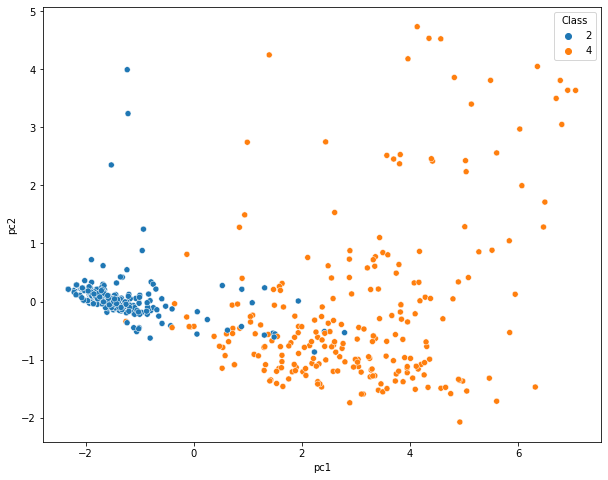

In [162]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=projected,x='pc1',y='pc2',hue='Class',palette='tab10')
plt.show()